### Doing the report in Python since I have an issue with setting up R

### Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### Read Data from Public URL
#### The file has approximately 26000 records and 19 columns

In [2]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD')
df.shape

(25596, 19)

### Check available columns, their datatype and fill rate

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25596 entries, 0 to 25595
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             25596 non-null  int64  
 1   OCCUR_DATE               25596 non-null  object 
 2   OCCUR_TIME               25596 non-null  object 
 3   BORO                     25596 non-null  object 
 4   PRECINCT                 25596 non-null  int64  
 5   JURISDICTION_CODE        25594 non-null  float64
 6   LOCATION_DESC            10619 non-null  object 
 7   STATISTICAL_MURDER_FLAG  25596 non-null  bool   
 8   PERP_AGE_GROUP           16252 non-null  object 
 9   PERP_SEX                 16286 non-null  object 
 10  PERP_RACE                16286 non-null  object 
 11  VIC_AGE_GROUP            25596 non-null  object 
 12  VIC_SEX                  25596 non-null  object 
 13  VIC_RACE                 25596 non-null  object 
 14  X_COORD_CD            

### Dropping columns which will not be part of the analysis<br>Converting the shooting occurence date and time to a datetime format<br>Filling null values in the data regarding perpetrators with Unknown<br>Mapping the Jurisdiction Codes with the actual values for better consumption<br>Adding a Year and Hour Column for Better Analysis

In [4]:
df = df.drop(['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'LOCATION_DESC'], axis=1)

df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'])

df['PERP_AGE_GROUP'] = df['PERP_AGE_GROUP'].fillna('UNKNOWN')
df['PERP_RACE'] = df['PERP_RACE'].fillna('UNKNOWN')
df['PERP_SEX'] = df['PERP_SEX'].fillna('U')

df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].replace({0: 'Patrol', 1: 'Transit', 2: 'Housing'})

df['OCCUR_YEAR'] = df['OCCUR_DATE'].dt.year
df['OCCUR_HOUR'] = df['OCCUR_TIME'].dt.hour

### The data contains shooting incidents information from 2006 to 2021

In [5]:
df['OCCUR_DATE'].min(), df['OCCUR_DATE'].max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

### 83% of shooting incidents were reported / captured by Patrols. 
#### This could mean they were the first responders or were already in the neighbourhood during the incident

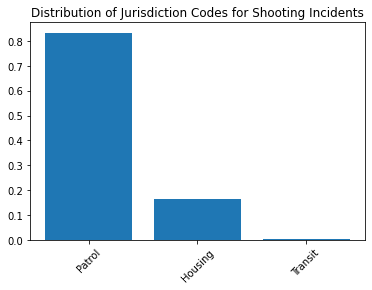

In [6]:
plt.xticks(rotation=45)
plt.title('Distribution of Jurisdiction Codes for Shooting Incidents')
_ = plt.bar(df['JURISDICTION_CODE'].value_counts(normalize=True).index,
        df['JURISDICTION_CODE'].value_counts(normalize=True))

#### Brooklyn accounts for 40% of all Shooting Incidents

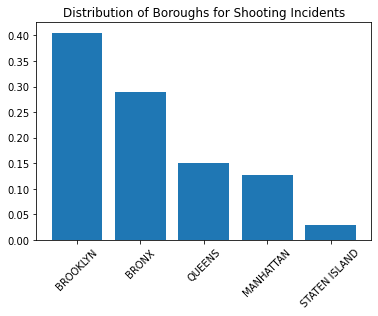

In [7]:
plt.xticks(rotation=45)
plt.title('Distribution of Boroughs for Shooting Incidents')
_ = plt.bar(df['BORO'].value_counts(normalize=True).index,
        df['BORO'].value_counts(normalize=True))

### There are 77 precincts and precincts 75 & 73 account for 11% of all shooting incidents

In [8]:
df['PRECINCT'].value_counts(normalize=True).head(5)

75    0.057431
73    0.053602
67    0.045320
79    0.038365
44    0.037076
Name: PRECINCT, dtype: float64

### Only 19% of all shooting incidents are considered as murders. This does not directly mean only 19% of these incidents resulted in deaths since some shooting incidents can be recorded as accidental shootings etc

In [9]:
df['STATISTICAL_MURDER_FLAG'].value_counts(normalize=True)

False    0.80747
True     0.19253
Name: STATISTICAL_MURDER_FLAG, dtype: float64

### There is a steady decline in the number of shooting incidents since 2011 till 2018 followed by a massive spike (almost 100%) in the number of incidents from 2019. This could be due to lenient gun laws or due to a difference in how the information was collected

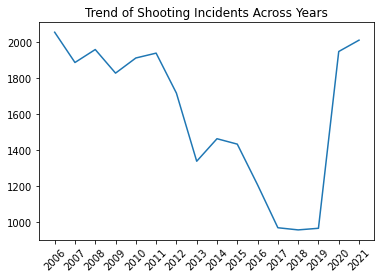

In [10]:
plt.title('Trend of Shooting Incidents Across Years')
plt.xticks(sorted(df['OCCUR_YEAR'].unique()), rotation=45)
_ = plt.plot(df['OCCUR_YEAR'].value_counts().sort_index())

### Most Shooting Incidents seem to Happen from Evening till Early Morning (5PM to 4AM), With Maximum Incidents Occuring from 11-12PM

In [25]:
df['OCCUR_HOUR'].value_counts(normalize=True).cumsum()

23    0.085560
0     0.165768
22    0.244765
1     0.322199
21    0.394827
2     0.462299
20    0.523754
3     0.584076
4     0.637756
19    0.691045
18    0.735545
17    0.775004
16    0.812822
15    0.846187
14    0.874824
5     0.900883
13    0.920339
12    0.938389
11    0.951867
6     0.964838
10    0.975504
7     0.984177
8     0.992225
9     1.000000
Name: OCCUR_HOUR, dtype: float64

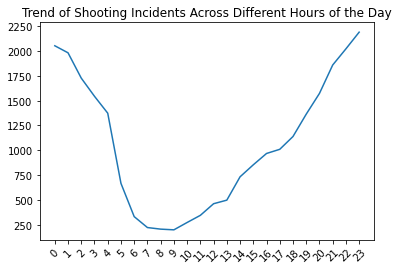

In [12]:
plt.title('Trend of Shooting Incidents Across Different Hours of the Day')
plt.xticks(sorted(df['OCCUR_HOUR'].unique()), rotation=45)
_ = plt.plot(df['OCCUR_HOUR'].value_counts().sort_index())

### A vast majority of the victims are Young-Adult men belonging to a marginalized race (African-Americans or Hispanics). This data may not reflect the actual reality and is very likely biased towards certain ethnicities of people (recent police events and actions have also strengthened this suspicion). A systemic change is required from the NYPD to recognize and work towards removing this bias.

### 90% of the the victims are Male

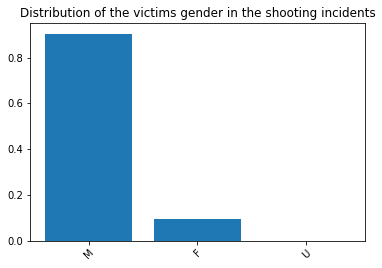

In [13]:
plt.title('Distribution of the victims gender in the shooting incidents')
plt.xticks(rotation=45)
_ = plt.bar(df['VIC_SEX'].value_counts(normalize=True).index,
        df['VIC_SEX'].value_counts(normalize=True))

### More than 80% of the victims are aged between 18-44 

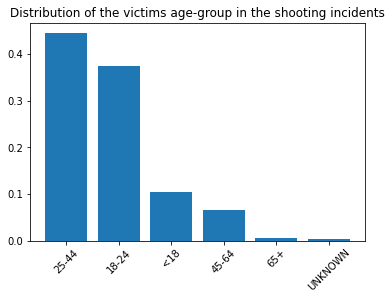

In [14]:
plt.title('Distribution of the victims age-group in the shooting incidents')
plt.xticks(rotation=45)
_ = plt.bar(df['VIC_AGE_GROUP'].value_counts(normalize=True).index,
        df['VIC_AGE_GROUP'].value_counts(normalize=True))

### More than 95% of the victims are either Black or Hispanic in race

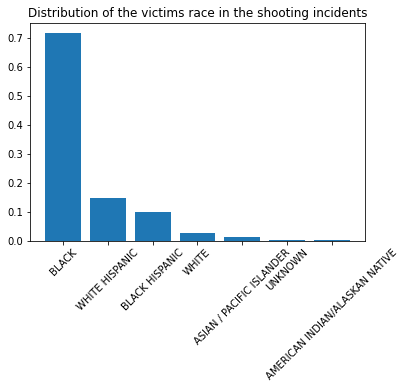

In [15]:
plt.title('Distribution of the victims race in the shooting incidents')
plt.xticks(rotation=45)
_ = plt.bar(df['VIC_RACE'].value_counts(normalize=True).index,
        df['VIC_RACE'].value_counts(normalize=True))

### In stark contrast to the victims information almost half the incidents don't have information regarding the perpetrators age, race or gender.<br>This indicates that in half the cases the NYPD is unable to determine who the shooter was.<br>There could also be inherent bias here where shooting incidents which don't involve minorities don't get registered.

### The age-group of almost 50% of the perpetrators is Unknown. Around 40% of the remaining perps are between 18-44 in age

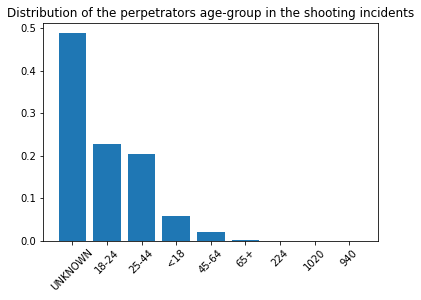

In [17]:
plt.title('Distribution of the perpetrators age-group in the shooting incidents')
plt.xticks(rotation=45)
_ = plt.bar(df['PERP_AGE_GROUP'].value_counts(normalize=True).index,
        df['PERP_AGE_GROUP'].value_counts(normalize=True))

### The race data of almost 45% of the perpetrators is Unknown. Perpetrators from a Black and Hispanic ethnicity account for almost all the perps in the remaining incidents

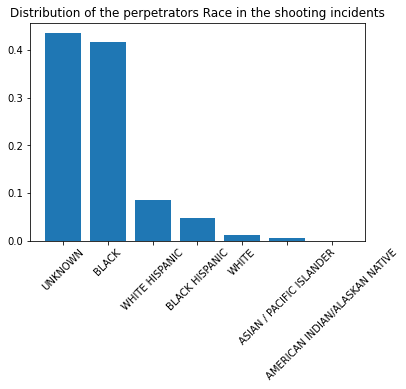

In [18]:
plt.title('Distribution of the perpetrators Race in the shooting incidents')
plt.xticks(rotation=45)
_ = plt.bar(df['PERP_RACE'].value_counts(normalize=True).index,
        df['PERP_RACE'].value_counts(normalize=True))

### Most of the perpetrators are Male but the gender information of almost 40% of perpetrators is unknown

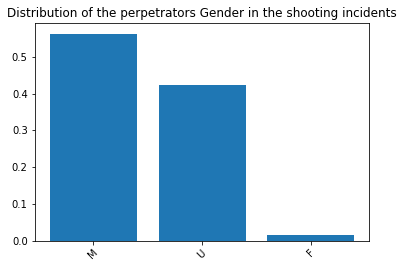

In [19]:
plt.title('Distribution of the perpetrators Gender in the shooting incidents')
plt.xticks(rotation=45)
_ = plt.bar(df['PERP_SEX'].value_counts(normalize=True).index,
        df['PERP_SEX'].value_counts(normalize=True))

### Creating a model using "OCCUR_YEAR" as the independent variable and number of shooting incidents are the dependent variable.<br>A negative intercept of the year variable indicates that it's negatively correlated with the number of shooting incidents (which is true from the data).<br>The R2 score indicates the performance of the model is weak.<br>This could be increased by adding further variables to the model

In [20]:
model_df = df.groupby('OCCUR_YEAR')['INCIDENT_KEY'].nunique().reset_index().rename(columns={'INCIDENT_KEY':
                                                                                            '#INCIDENTS'})

reg = LinearRegression().fit(model_df[['OCCUR_YEAR']], model_df['#INCIDENTS'])
print('intercept:', reg.intercept_, '\nyear_variable_coef: ', reg.coef_[0])
print('R2 score: ', reg.score(model_df[['OCCUR_YEAR']], model_df['#INCIDENTS']))

intercept: 63599.388235294085 
year_variable_coef:  -30.961764705882338
R2 score:  0.24464345306233004
